# [**Apprentissage en ligne d'un dictionnaire de parties de visages**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_3_cluster/plot_dict_face_patches.ipynb)<br/>([*Online learning of a dictionary of parts of faces*](https://scikit-learn.org/stable/auto_examples/cluster/plot_dict_face_patches.html))

Cet exemple utilise un grand ensemble de données de visages pour apprendre un ensemble de 20 x 20 patchs d'images qui constituent des visages.

Du point de vue de la programmation, il est intéressant car il montre comment utiliser l'API en ligne du scikit-learn pour traiter un très grand ensemble de données par morceaux. La façon dont nous procédons est de charger une image à la fois et d'extraire au hasard 50 patchs de cette image. Une fois que nous avons accumulé 500 de ces patchs (en utilisant 10 images), nous exécutons la méthode [**`partial_fit`**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html) de l'objet KMeans en ligne, MiniBatchKMeans.

Le paramètre verbeux sur le MiniBatchKMeans nous permet de voir que certains clusters sont réaffectés lors des appels successifs à partial-fit. En effet, le nombre de patchs qu'ils représentent est devenu trop faible et il est préférable de choisir un nouveau cluster au hasard.

# Charger les données

In [1]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

# Apprendre le dictionnaire des images

In [2]:
import time

import numpy as np

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

print("Learning the dictionary... ")
rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True)
patch_size = (20, 20)

buffer = []
t0 = time.time()

# The online learning part: cycle over the whole dataset 6 times
index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print("Partial fit of %4i out of %i" % (index, 6 * len(faces.images)))

dt = time.time() - t0
print("done in %.2fs." % dt)

Learning the dictionary... 


c:\Users\franc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


[MiniBatchKMeans] Reassigning 6 cluster centers.
[MiniBatchKMeans] Reassigning 3 cluster centers.
Partial fit of  100 out of 2400
[MiniBatchKMeans] Reassigning 3 cluster centers.
[MiniBatchKMeans] Reassigning 2 cluster centers.
Partial fit of  200 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of  300 out of 2400
Partial fit of  400 out of 2400
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Partial fit of 2200 out of 2400
Pa

# Afficher les résultats

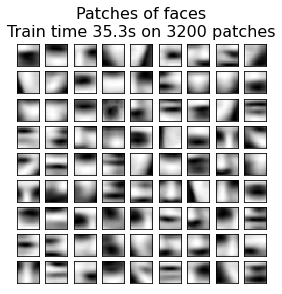

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())


plt.suptitle(
    "Patches of faces\nTrain time %.1fs on %d patches" % (dt, 8 * len(faces.images)),
    fontsize=16,
)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()